<a href="https://colab.research.google.com/github/sapirym/HeartDiseaseEDA/blob/master/HeartDiseaseEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Get Data


In [13]:
"""!mkdir data_heart_disease
import pandas as pd

!wget https://github.com/sapirym/HeartDiseaseEDA/blob/master/heart.csv -P data_heart_disease
"""
df = pd.read_csv("data_heart_disease/heart.csv")


# Categorial or Numerical
Categorial: sex, cp, fbs, restecg, exang, slope, ca, thal, target


In [28]:
c, n = 'Categorical', 'Numerical'
df.nunique()
#Categorial: sex, cp, fbs, restecg, exang, slope, ca, thal, target

df.dtypes
d = {'age':n, 'sex': c, 'cp':c, 'trestbps':n, 'chol':n, 'fbs':c, 'restecg':c, 'thalach':n, 'exang':c, 'oldpeak':n, 'slope':c, 'ca':c, 'thal':c, 'target':c}
data_class = pd.Series(d)

# Check if there is a missing data
df.isnull().sum()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

# Heart Disease Categorial VS Label

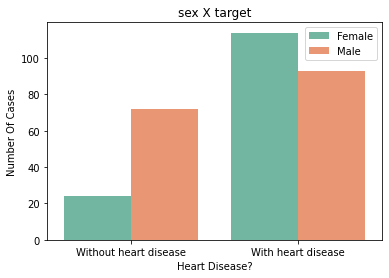

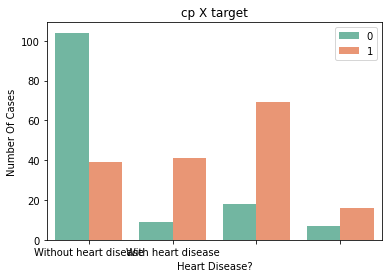

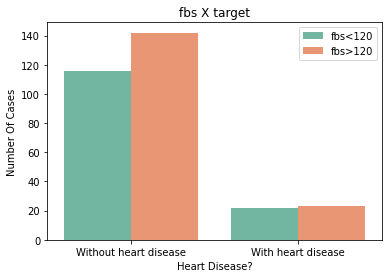

In [138]:
def plot_col_by_col(df, col1, legend_labels1,col2, legend_labels2):
  ax = sns.countplot(x=col1,data=df,hue=col2,palette='Set2')
  ax.set_xticklabels(legend_labels2)
  legend_labels, _= ax.get_legend_handles_labels()
  ax.legend(legend_labels, legend_labels1)
  plt.title(col1 + ' X ' + col2)
  return ax
  
#Categorial: sex, cp, fbs, restecg, exang, slope, ca, thal, target

ax = plot_col_by_col(df, 'sex', ['Female','Male'], 'target', ['Without heart disease', 'With heart disease'])
plt.xlabel('Heart Disease?')
plt.ylabel('Number Of Cases')

plt.show()

ax = plot_col_by_col(df, 'cp', ['0','1', '2', '3'], 'target', ['Without heart disease', 'With heart disease'])

plt.xlabel('Heart Disease?')
plt.ylabel('Number Of Cases')

plt.show()

ax = plot_col_by_col(df, 'fbs', ['fbs<120','fbs>120'], 'target', ['Without heart disease', 'With heart disease'])
plt.xlabel('Heart Disease?')
plt.ylabel('Number Of Cases')

plt.show()

# Important Graph - CP
We can see corrolation between ST depression (oldpeak) and cp

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


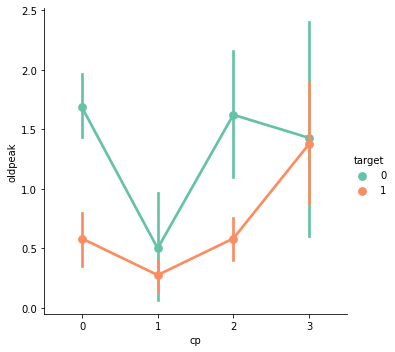

In [129]:
sns.factorplot(y='oldpeak',data=df,x='cp',hue='target',palette='Set2')
plt.show()


# Age Density Disribution

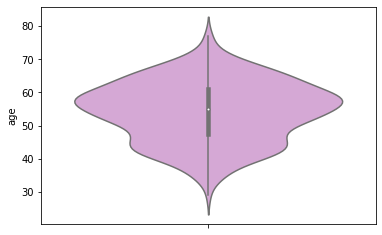

In [93]:

df_heart_disease = df.loc[df['target'] == 1]
df_heart_disease['age'].value_counts()
sns.violinplot(y='age', data=df, color='plum')


# HeatMap - Blood Pressure VS Chest Pain
We can see corrolation between BP and Chest Pain - with heart disease only

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


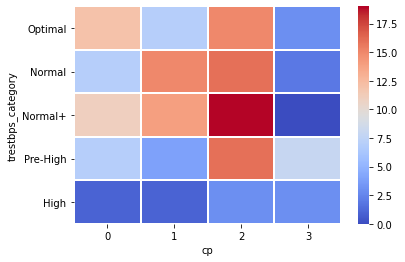

In [131]:
def split_age(df):
  df['age_category'] = df.age
  df['age_category'] = pd.cut(df['age_category'], bins=[0, 20, 40,60,80,100], 
        include_lowest=True, labels=['Young','Adult','Adult+', 'Old', 'Old+'])
  return df

def split_trestbps(df):
  df['trestbps_category'] = df.trestbps
  df['trestbps_category'] = pd.cut(df['trestbps_category'], bins=[0, 119,129, 139,159,179], 
        include_lowest=True, labels=['Optimal', 'Normal','Normal+','Pre-High', 'High'])
  return df
  
def get_heat_map(df, column1, column2):
  corr_table = df.groupby([column1,column2]).size().unstack()

  sns.heatmap(corr_table,cmap='coolwarm',linecolor='white', linewidths=1)

#df = split_age(df)
#get_heat_map(df, 'age_category', 'cp')

#df_heart_disease = split_age(df_heart_disease)
#get_heat_map(df_heart_disease, 'age_category', 'cp')

d = split_trestbps(df_heart_disease)
get_heat_map(d, 'trestbps_category', 'cp')

#HeatMap - All Features VS All Features

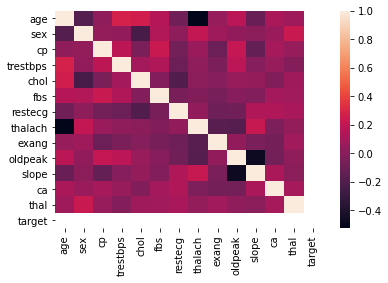

In [141]:
corr = df_heart_disease.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# Feature Distribution - With Heart Disease

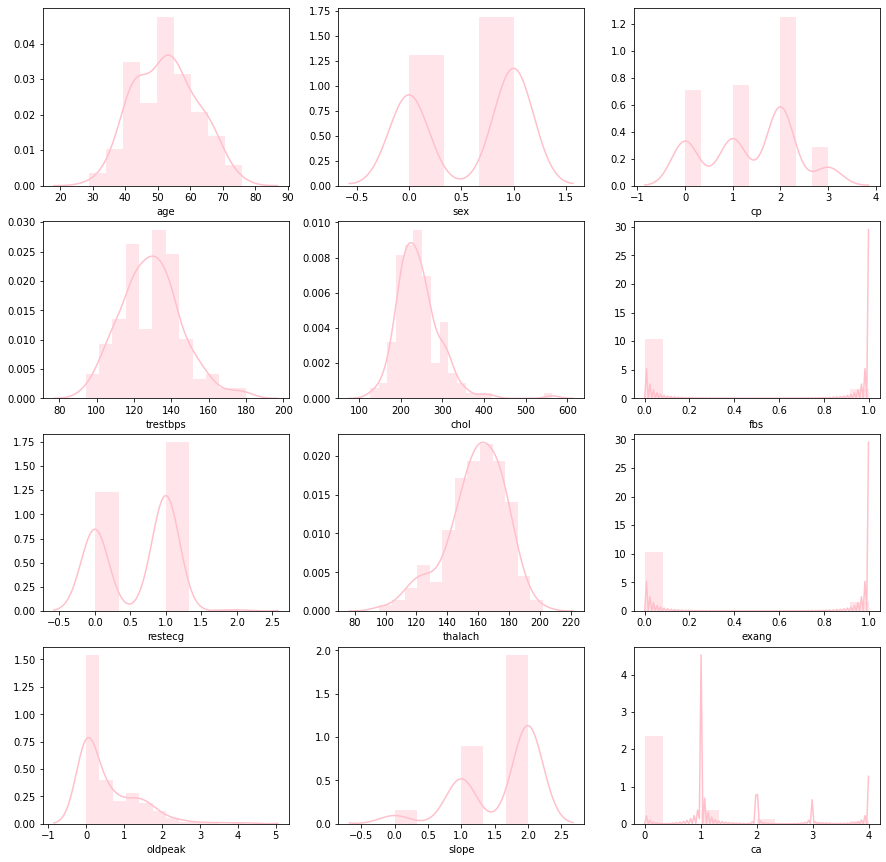

In [136]:
fig,ax=plt.subplots(4,3,figsize=(15,15))
for i in range(12):
    plt.subplot(4,3,i+1)
    sns.distplot(df_heart_disease.iloc[:,i], color='pink')